<h1>Dynamic modelling of a MDOF mass-spring structure</h1>

## Table of Contents

* [Description](#1)
* [Analysis of the strucutre dynamics](#2)


### Description <a class="anchor" id="1"></a>
In this example we simulate astudy the effect of the structural properties of a MDOF mass-spring structure in its dynamical paramters. The structure consists of a series of masses connected by springs, with a fixed-fixed boundary condition. 

<img src="MDOF_system.png" width="650">

To simulate the system, we represent it as a series of mass-stiffness-damping elements, after dividing the beam into $n$ elements of length $l$.

Each element has a mass and stiffness value of:

$m_n=\frac{\rho A l}{2}$ ($kg$) and $k_n=\frac{E A}{l}$ ($N/m$)

The equations of motion of the structure are defined as follows:
$$
\left[\boldsymbol{M}_o\right]\{\ddot{\boldsymbol{y}}\}+\left[\boldsymbol{C}_o\right]\{\dot{\boldsymbol{y}}\}+\left[\boldsymbol{K}_o\right]\{\boldsymbol{y}\}=\left\{\boldsymbol{d}_o\right\} x
$$

where

$$
\left[\boldsymbol{K}_o\right]=\left[\begin{array}{cccc}
k_1+k_2 & -k_2 & & 0 \\
-k_2 & k_2+k_3 & & \\
& & \ddots & -k_n \\
0 & & -k_n & k_n+k_{n+1}
\end{array}\right] \quad\left[\boldsymbol{M}_o\right]=\left[\begin{array}{llll}
m_1 & & & 0 \\
& m_2 & & \\
& & \ddots & \\
0 & & & m_n
\end{array}\right]
$$

and the damping matrix is defined through proportional damping as $\left[\boldsymbol{C}_o\right]=\alpha\left[\boldsymbol{M}_o\right]+\beta\left[\boldsymbol{K}_o\right]$ where $\alpha = 1\times 10^{-6}$ and $\beta=1\times 10^{-3}$.

Here, we consider that the excitation force $x(t)$ enters only to the first DOF, so that

$$
\left\{\boldsymbol{d}_o\right\}=\left[\begin{array}{l}
1 \\
0 \\
\vdots \\
0
\end{array}\right]
$$

### Analysis of the structure dynamics <a class="anchor" id="2"></a>

The structure has all the stiffness, mass and damping elements are the same. Thus, $k_1 = k_2 = \dots = k_n=k$, $m_1 = m_2 = \dots = m_n = m$ and $c_1 = c_2 = \dots = c_n = c$
The code below calculates the natural frequencies and mode shapes for an aluminum beam with Young's modulus $E = 69 GPa$, circular cross-section of diameter 40 $mm$, density $\rho = 2.7\times 10^3$ $kg/m^3$, and a total length of 4 $m$.

In [1]:
import numpy as np

# Structural properties of the beam
E = 69e9                    # Elasticity modulus (Pa)
L = 4                       # Length (m)
d = 40e-3                   # Cross-section diameter (m)
rho = 2.7e3                 # Density (kg/m^3)
A = np.pi * (d / 2) ** 2    # Cross-sectional area (m^2)



The matrix $K_o$,  $M_o$ and $C_o$ are computed as 


In [2]:
# FEM definition
n = 4                                           # Number of elements (How many measuring points or dof)

# Individual element stiffness and mass
l = L / (n + 1)                                 # Dividing the beam lenght in n elemment
ko = E * A / l * np.array([[1, -1], [-1, 1]])   # The stiffness value per each beam-element
mo = (rho * A * l)/2 * np.eye(2)                    # The mass of each element

# Construct the mass and stiffness matrices
Ko = np.zeros((n + 2, n + 2))                  
Mo = np.zeros((n + 2, n + 2))                  


# Loop from 1 to n+1
for i in range(1, n + 2):
    ind = np.arange(i - 1, i + 1)              # Create an array for indices 
    Ko[ind[:, np.newaxis], ind] += ko          # Building the global stiffness matrix
    Mo[ind[:, np.newaxis], ind] += mo          # Building the global mass matrix
 
    
# Boundary conditions - fixed-fixed (remove first and )
Ko = Ko[1:n + 1, 1:n + 1]
Mo = Mo[1:n + 1, 1:n + 1]


# Damping matrix (as defiend above - proportional damping)
alpha = 1e-6
beta = 1e-3
Co = alpha * Ko + beta * Mo

# Force input matrix
d = np.zeros(n)
d[0] = 1

Let's calculate the natural frequencies, mode shapes and damping ratios of the system:

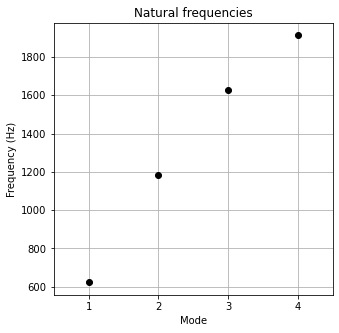

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as la


# Perform modal analysis - undamped system
eigenvalues, eigenvectors = la.eigh(Ko, Mo)

# Extract natural frequencies (square root of eigenvalues)
omegaO = np.sqrt(eigenvalues.real)

# Psi contains the eigenvectors as columns
Psi = eigenvectors 

# Modal damping
zeta = np.diag(Psi.T.dot(Co).dot(Psi)) / (2 * omegaO)  #zeta=(Phi^T*Co*Phi)/2*omegaO

plt.figure(figsize=(5, 5))
plt.plot(np.arange(1, n + 1), omegaO / (2 * np.pi), 'o', color='black')
plt.grid(True)
plt.xlabel('Mode')
plt.ylabel('Frequency (Hz)')
plt.xlim(0.5, n + 0.5)
plt.xticks(np.arange(1, n + 1))
plt.title('Natural frequencies')
plt.show()


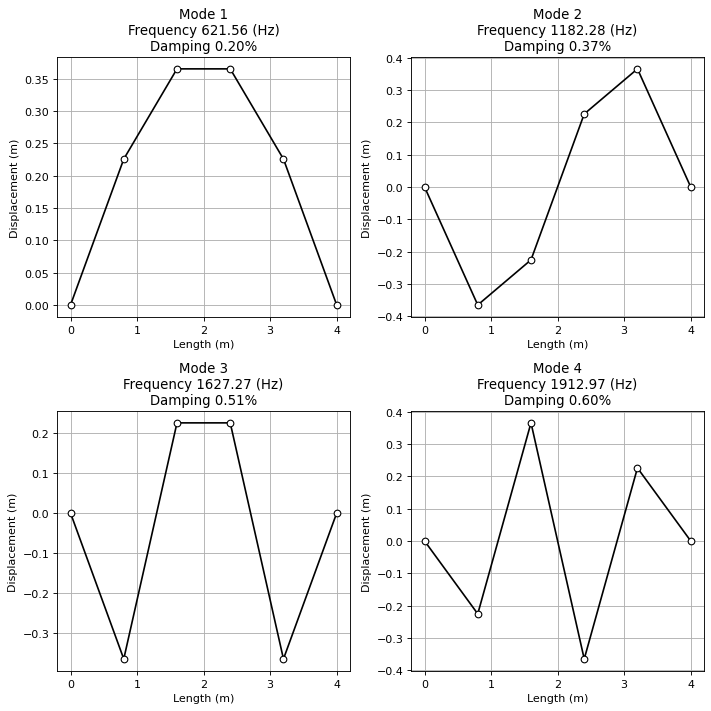

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Create a figure with specified position
fig = plt.figure(figsize=(9, 9), dpi=80)  # Adjust the figsize and dpi as needed

# Loop for subplots
for i in range(1, 5):
    ax = fig.add_subplot(2, 2, i)
    x_values = np.concatenate(([0], np.arange(1, n + 1) * l, [L]))
    y_values = np.concatenate(([0], Psi[:, i - 1], [0]))
    
    ax.plot(x_values, y_values, '-o', color='black', markeredgecolor='black', markerfacecolor='white')
    ax.grid(True)
    ax.set_xlabel('Length (m)')
    ax.set_ylabel('Displacement (m)')
    ax.set_title(f"Mode {i}\nFrequency {omegaO[i - 1] / (2 * np.pi):.2f} (Hz)\nDamping {100 * zeta[i - 1]:.2f}%")

# Adjust subplot layout
fig.tight_layout()

# Show the plot
plt.show()


Now, we can calculate the Frequency Response Function (FRF) matrix, as:

$\left[\boldsymbol{H}_o(s)\right]=\left(\left[\boldsymbol{M}_o\right] s^2+\left[\boldsymbol{C}_o\right] s+\left[\boldsymbol{K}_o\right]\right)^{-1}\left\{\boldsymbol{d}_o\right\}$

with 

$s = j \omega$

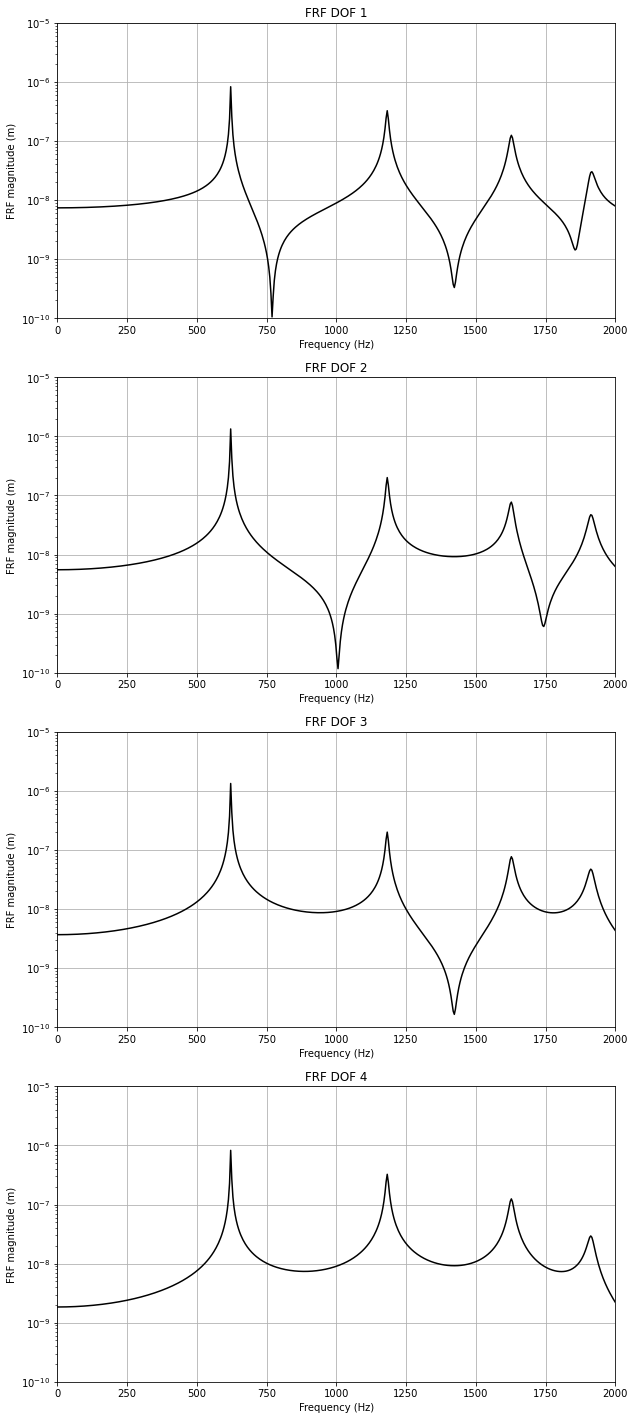

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import solve

# Define the frequency vector to calculate the FRF
nf = 500                         # Number of frequency points for FRF calculation
fs= 4000                         # Sampling frequency
f = np.linspace(0, fs/2, nf)     # Generating the Frequency vector (Hz) 
Om = 2 * np.pi * f               # Frequency vector (rad/s)

Ho = np.zeros((n, nf), dtype=complex) # Buiding the matrix space

for i in range(nf):
    A = Ko - Mo * Om[i]**2 + 1j * Co * Om[i]
    Ho[:, i] = solve(A, d)                       # Solving a linear equation of this form a @ x == b

plt.figure(figsize=(10, 25))
for i in range(n):
    plt.subplot(n, 1, i + 1)
    plt.semilogy(f, np.abs(Ho[i, :]), color='black')
    plt.grid(True)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('FRF magnitude (m)')
    plt.title(f'FRF DOF {i + 1}')
    plt.ylim(1e-10, 1e-5)
    plt.xlim(0, fs/2)

plt.show()